In [1]:
import json
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (7.6,4)
import lhapdf
import numpy as np
import math

In [2]:
with open('fitting_param.json') as jout_infile:
    j_fitparam = json.load(jout_infile)

fDSSLO
fDSSNLO
JAM20


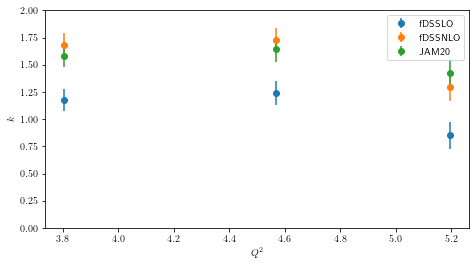

In [3]:
for ff_key,fit_param in j_fitparam.items():
    FF_name = ff_key
    print(FF_name)
    Q2 = fit_param["Q2"]
    ks = fit_param["k"]
    kerrs = fit_param['kerr']
    plt.errorbar(Q2,ks,kerrs,fmt = "o",label = FF_name)
plt.xlabel(r'$Q^2$')
plt.ylabel(r'$k$')
plt.ylim(0,2)
plt.legend()
plt.savefig(f"/Users/shuojia/CSV/results/ratios/xCSV_MRST_FITparam.png")

fDSSLO
fDSSNLO
JAM20


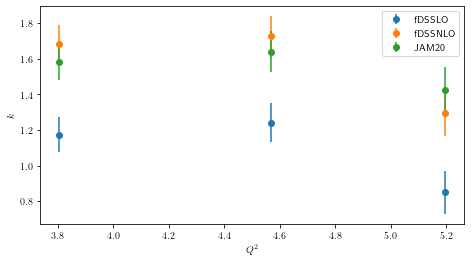

In [4]:
for ff_key,fit_param in j_fitparam.items():
    FF_name = ff_key
    print(FF_name)
    Q2 = fit_param["Q2"]
    ks = fit_param["k"]
    kerrs = fit_param['kerr']
    plt.errorbar(Q2,ks,kerrs,fmt = "o",label = FF_name)
plt.xlabel(r'$Q^2$')
plt.ylabel(r'$k$')
#plt.ylim(0,2)
plt.legend()

fDSSLO
fDSSNLO
JAM20
Geiger


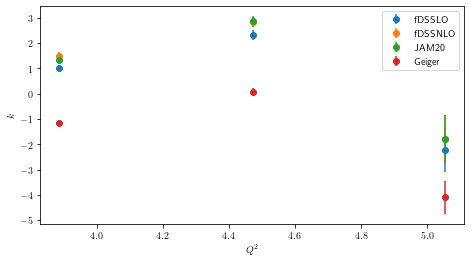

In [5]:
with open('fitting_param_Q2cut.json') as jout_Q2cut:
    j_Q2cut = json.load(jout_Q2cut)
for ff_key,fit_param in j_Q2cut.items():
    FF_name = ff_key
    print(FF_name)
    Q2 = fit_param["Q2"]
    ks = fit_param["k"]
    kerrs = fit_param['kerr']
    plt.errorbar(Q2,ks,kerrs,fmt = "o",label = FF_name)
plt.xlabel(r'$Q^2$')
plt.ylabel(r'$k$')
#plt.ylim(0,2)
plt.legend()

In [6]:
import lhapdf
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
def Ax(Q,xbj):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
def Bx(Q,xbj,z_had):
    B_NS = 5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
    B_sz = (JAM20.xfxQ(3,z_had,Q)+JAM20.xfxQ(-3,z_had,Q))/JAM20.xfxQ(2,z_had,Q)/(1+JAM20.xfxQ(-2,z_had,Q)/JAM20.xfxQ(2,z_had,Q)) 
    B_S = B_sz*(p_cteq6.xfxQ(3,xbj,Q)+p_cteq6.xfxQ(-3,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
    return  2.5+B_NS+B_S
    
def Get_D_fav(Q,z_had):
    """
    #Kretzer
    Dd_plus = 0.217*z_had**-1.805*(1-z_had)**2.037
    D_fav = Dd_plus;
    """
    #Binneweis
    Lambda = 0.227
    sv = math.log(math.log(Q*Q/(Lambda**2))/math.log(2/Lambda**2))
    N = 1.150-1.522*sv+1.378*sv**2-0.527*sv**3
    a1 = -0.740-1.680*sv+1.546*sv**2-0.596*sv**3
    a2 = 1.430+0.543*sv-0.023*sv**2
    D_sum = N*z_had**a1*(1.0-z_had)**a2
    #Ratio of D-/D+ from P.Geiger's thesis HERMES
    R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
    D_fav = D_sum/(1.0+R_D)
    
    return D_fav
def Get_D_unfav(Q,z_had):
    """
    #Kretzer
    Du_plus = 0.689*z_had**-1.039*(1-z_had)**1.241
    D_unfav = Du_plus;
    """
    #Binneweis
    Lambda = 0.227
    sv = math.log(math.log(Q*Q/(Lambda**2))/math.log(2/Lambda**2))
    N = 1.150-1.522*sv+1.378*sv**2-0.527*sv**3
    a1 = -0.740-1.680*sv+1.546*sv**2-0.596*sv**3
    a2 = 1.430+0.543*sv-0.023*sv**2
    D_sum = N*z_had**a1*(1.0-z_had)**a2
    #Ratio of D-/D+ from P.Geiger's thesis HERMES
    R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
    D_unfav = D_sum/(1.0+1.0/R_D)
    
    return D_unfav
def Dz(Q,z_had):
    '''
    #Kretzer
    Dd_plus = 0.217*z_had**-1.805*(1-z_had)**2.037
    Du_plus = 0.689*z_had**-1.039*(1-z_had)**1.241 
    delta_z = Dd_plus/Du_plus
    '''
    if i_FF == 0:
        #fDSS lo
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        delta_z = duminus/duplus
        return (1-delta_z)/(1+delta_z)
    elif i_FF == 1:
        #fDSS nlo
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        delta_z = duminus/duplus
        return (1-delta_z)/(1+delta_z)
    elif i_FF == 2:
        duplus = JAM20.xfxQ(2,z_hadron,Q)
        duminus = JAM20.xfxQ(-2,z_hadron,Q)
        delta_z = duminus/duplus
        return (1-delta_z)/(1+delta_z)
    elif i_FF == 3:
        #P.Geiger's thesis
        R_D = (1.0-z_had)**0.0083583/(1.0+z_had)**1.9838
        delta_z = R_D
        return (1-delta_z)/(1+delta_z) 
  
def Get_average(values):
    sums = 0
    for i in values:
        sums+=i
    return sums/len(values)
def Get_average_sigma(values):
    sums = 0
    sum2 = 0
    N = len(values)
    for i in values:
        sums+=i
        sum2+=i*i
    
    return math.sqrt(sum2/N-sums/N*sums/N)
def Get_sigma(errs):
    sums = 0
    for i in errs:
        sums+=1/i**2
    return math.sqrt(1/sums)

def CSVx(Q,z_had,xbj,RDmeas):
    return (Bx(Q,xbj,z_had)-Dz(Q,z_had)*(RDmeas+2.5))/Ax(Q,xbj)
def CSVx_err(Q,z_had,xbj,RDmeas):
    return Dz(Q,z_had)*(RDmeas)/Ax(Q,xbj)
def MRST_xCSV(x,k):
    return x*2*k*(1-x)**4*x**-0.5*(x-0.0909)
def MRST_xCSV_err(x,k_err):
    return x*2*k_err*(1-x)**4*x**-0.5*(x-0.0909)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


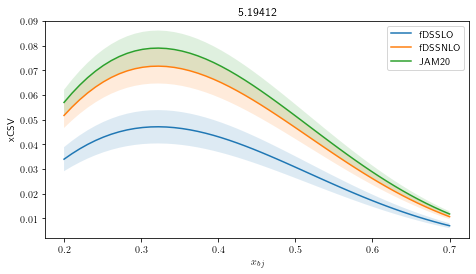

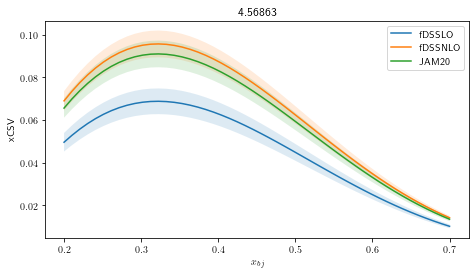

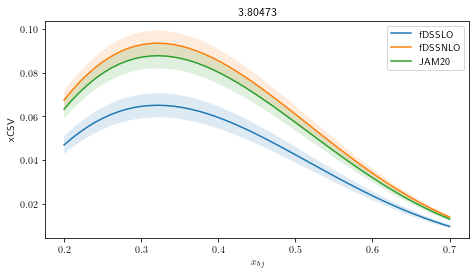

In [7]:
x_axis = np.linspace(0.2,0.7,50)
for i_Q2 in range(3):
    fig = plt.figure()
    ax = fig.add_subplot()
    Q2 = 0
    for ff_key,fit_param in j_fitparam.items():
        FF_name = ff_key
        #print(FF_name)
        Q2s = fit_param["Q2"]
        Q2 = Q2s[i_Q2]
        ks = fit_param["k"]
        kerrs = fit_param['kerr']
        fit_CSV = []
        fit_CSV_low = []
        fit_CSV_high = []
        ki = ks[i_Q2]
        kerri = kerrs[i_Q2]
        #for xi in xbj_ones_corr:
        for xi in x_axis:
            fit_CSV.append(MRST_xCSV(xi,ki))
            fit_CSV_low.append(MRST_xCSV(xi,ki)-MRST_xCSV_err(xi,kerri))
            fit_CSV_high.append(MRST_xCSV(xi,ki)+MRST_xCSV_err(xi,kerri))
        #plt.plot(xbj_ones_corr, fit_CSV_one, label="fit")
        plt.plot(x_axis, fit_CSV, label=FF_name)
        plt.fill_between(x_axis,fit_CSV_low,fit_CSV_high,alpha = 0.15)
    plt.legend()
    plt.title(Q2)
    plt.xlabel(r'$x_{bj}$')
    plt.ylabel('xCSV')
    plt.savefig(f"/Users/shuojia/CSV/results/ratios/xCSV_MRST_fit_{i_Q2}")

    

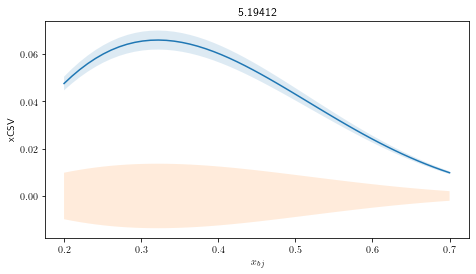

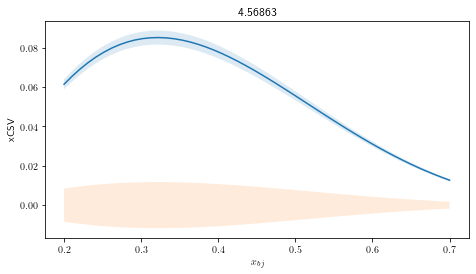

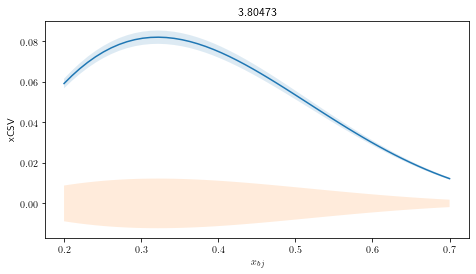

In [16]:
x_axis = np.linspace(0.2,0.7,50)
for i_Q2 in range(3):
    fig = plt.figure()
    ax = fig.add_subplot()
    CSVs_FFs = []
    CSVs_FFs_standarderr = []
   
    CSVs_FFs_sumofsigma = []
    
    Q2 = 0
    for xi in x_axis:
        CSV_FFs = []
        CSV_FFs_err = []
        for ff_key,fit_param in j_fitparam.items():
            FF_name = ff_key
            #print(FF_name)
            Q2s = fit_param["Q2"]
            Q2 = Q2s[i_Q2]
            ks = fit_param["k"]
            kerrs = fit_param['kerr']
            fit_CSV = []
            fit_CSV_low = []
            fit_CSV_high = []
            ki = ks[i_Q2]
            kerri = kerrs[i_Q2]
            CSV_FFs.append(MRST_xCSV(xi,ki))
            CSV_FFs_err.append(MRST_xCSV_err(xi,kerri))
        CSV_FFs_mean = Get_average(CSV_FFs)
        CSV_FFs_meanerr = Get_average_sigma(CSV_FFs)
        CSV_FFs_sumofsigma = Get_sigma(CSV_FFs_err)
        #print(CSV_FFs_err)
        #print(CSV_FFs_sumofsigma)
        CSVs_FFs.append(CSV_FFs_mean)
        CSVs_FFs_standarderr.append(CSV_FFs_meanerr)
        CSVs_FFs_sumofsigma.append(CSV_FFs_sumofsigma)
    
    plt.plot(x_axis,CSVs_FFs)
    plt.fill_between(x_axis,np.array(CSVs_FFs)-np.array(CSVs_FFs_sumofsigma),np.array(CSVs_FFs)+np.array(CSVs_FFs_sumofsigma),alpha = 0.15)
    #plt.legend()
    plt.fill_between(x_axis,np.array(CSVs_FFs_standarderr),-np.array(CSVs_FFs_standarderr),alpha = 0.15)
    plt.title(Q2)
    plt.xlabel(r'$x_{bj}$')
    plt.ylabel('xCSV')
    plt.savefig(f"/Users/shuojia/CSV/results/ratios/xCSV_MRST_fit_combined_{i_Q2}")



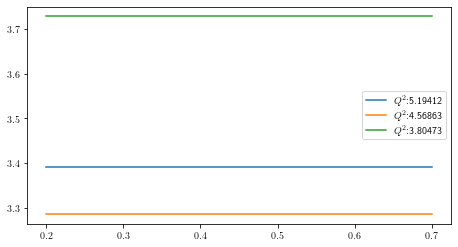

In [31]:
from matplotlib.ticker import FormatStrFormatter
x_axis = np.linspace(0.2,0.7,50)
for i_Q2 in range(3):
    #fig = plt.figure()
    #ax = fig.add_subplot()
    CSVs_FFs = []
    CSVs_FFs_standarderr = []
    CSVs_FFs_sumofsigma = []
    Q2 = 0
    for xi in x_axis:
        CSV_FFs = []
        CSV_FFs_err = []
        for ff_key,fit_param in j_fitparam.items():
            FF_name = ff_key
            #print(FF_name)
            Q2s = fit_param["Q2"]
            Q2 = Q2s[i_Q2]
            ks = fit_param["k"]
            kerrs = fit_param['kerr']
            fit_CSV = []
            fit_CSV_low = []
            fit_CSV_high = []
            ki = ks[i_Q2]
            kerri = kerrs[i_Q2]
            CSV_FFs.append(MRST_xCSV(xi,ki))
            CSV_FFs_err.append(MRST_xCSV_err(xi,kerri))
        CSV_FFs_mean = Get_average(CSV_FFs)
        CSV_FFs_meanerr = Get_average_sigma(CSV_FFs)
        CSV_FFs_sumofsigma = Get_sigma(CSV_FFs_err)
        #print(CSV_FFs_err)
        #print(CSV_FFs_sumofsigma)
        CSVs_FFs.append(CSV_FFs_mean)
        CSVs_FFs_standarderr.append(CSV_FFs_meanerr)
        CSVs_FFs_sumofsigma.append(CSV_FFs_sumofsigma)
        
    RBarlow = np.array(CSVs_FFs_standarderr)/np.array(CSVs_FFs_sumofsigma)
    #print(np.array(CSVs_FFs_standarderr)/np.array(CSVs_FFs_sumofsigma))
        
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(x_axis,RBarlow,label = f'$Q^2$:{Q2}')
    plt.legend()
    #plt.title()
    #plt.ylim(3,4)

In [10]:
def Get_mean_lists(list1,list2,list3):
    list_ave = []
    for i in range(len(list1)):
        list_ave.append((list1[i]+list2[i]+list3[i])/3)
    return list_ave
def Get_meansigma_lists_low(list1,list2,list3):
    list_sig = []
    for i in range(len(list1)):
        ave = (list1[i]+list2[i]+list3[i])/3
        sig = ((list1[i]-ave)**2+(list2[i]-ave)**2+(list2[i]-ave)**2)/3
        list_sig.append(ave-math.sqrt(sig))
    return list_sig
def Get_mean_lists(list1,list2,list3):
    list_ave = []
    for i in range(len(list1)):
        list_ave.append((list1[i]+list2[i]+list3[i])/3)
    return list_ave
def Get_meansigma_lists(list1,list2,list3):
    list_sig = []
    for i in range(len(list1)):
        ave = (list1[i]+list2[i]+list3[i])/3
        sig = ((list1[i]-ave)**2+(list2[i]-ave)**2+(list2[i]-ave)**2)/3
        list_sig.append(math.sqrt(sig))
    return list_sig
   
def Get_sumofsigma_lists(list1,list2,list3):
    list_sig = []
    for i in range(len(list1)):
        sumofsig = 1/list1[i]**2+1/list2[i]**2+1/list3[i]**2
        list_sig.append(math.sqrt(1/sumofsig))
    return list_sig

Text(0.5, 1.0, '5.19412')

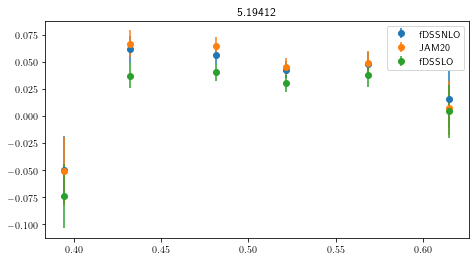

In [11]:
with open('CSVs.json') as jCSV_infile:
    j_CSV = json.load(jCSV_infile)
#for first Q2
Q2 = 0
for FF_key,FF_values in j_CSV.items():
    FF_name  = FF_key
    Q2s = FF_values["Q2"]
    Q2 = Q2s[0]
    xbjs = FF_values["xbj_ones"]
    CSVs = FF_values["CSVs_ones"]
    CSVs_err = FF_values["CSVs_ones_errs"]
    plt.errorbar(xbjs,CSVs,CSVs_err,fmt = "o",label = FF_name)
plt.legend()
plt.title(Q2)

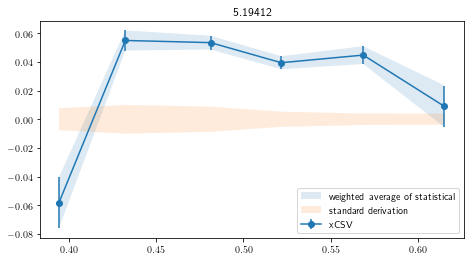

In [12]:
with open('CSVs.json') as jCSV_infile:
    j_CSV = json.load(jCSV_infile)
#for first Q2
Q2 = 0
CSV_means = []
CSV_means_sig = []

xbjs = []
for FF_key,FF_values in j_CSV.items():
    FF_name  = FF_key
    Q2s = FF_values["Q2"]
    Q2 = Q2s[0]
    xbjs = FF_values["xbj_ones"]
    CSVs = FF_values["CSVs_ones"]
    CSVs_err = FF_values["CSVs_ones_errs"]
    CSV_means.append(CSVs)
    CSV_means_sig.append(CSVs_err)
CSV_mean = np.array(Get_mean_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_mean_err = np.array(Get_meansigma_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_sumofsigma = np.array(Get_sumofsigma_lists(CSV_means_sig[0],CSV_means_sig[1],CSV_means_sig[2]))
plt.errorbar(xbjs,CSV_mean,CSV_sumofsigma,fmt = "-o",label = "xCSV")
plt.fill_between(xbjs,CSV_mean-CSV_sumofsigma,CSV_mean+CSV_sumofsigma,alpha = 0.15,label = "weighted average of statistical")
plt.fill_between(xbjs,-CSV_mean_err,CSV_mean_err,alpha = 0.15,label = "standard derivation")
plt.title(Q2)
plt.legend()
#plt.title(Q2)

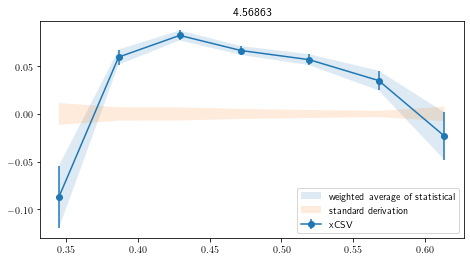

In [13]:
with open('CSVs.json') as jCSV_infile:
    j_CSV = json.load(jCSV_infile)
#for first Q2
Q2 = 0
CSV_means = []
CSV_means_sig = []

xbjs = []
for FF_key,FF_values in j_CSV.items():
    FF_name  = FF_key
    Q2s = FF_values["Q2"]
    Q2 = Q2s[1]
    xbjs = FF_values["xbj_twos"]
    CSVs = FF_values["CSVs_twos"]
    CSVs_err = FF_values["CSVs_twos_errs"]
    CSV_means.append(CSVs)
    CSV_means_sig.append(CSVs_err)
CSV_mean = np.array(Get_mean_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_mean_err = np.array(Get_meansigma_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_sumofsigma = np.array(Get_sumofsigma_lists(CSV_means_sig[0],CSV_means_sig[1],CSV_means_sig[2]))
plt.errorbar(xbjs,CSV_mean,CSV_sumofsigma,fmt = "-o",label = "xCSV")
plt.fill_between(xbjs,CSV_mean-CSV_sumofsigma,CSV_mean+CSV_sumofsigma,alpha = 0.15,label = "weighted average of statistical")
plt.fill_between(xbjs,-CSV_mean_err,CSV_mean_err,alpha = 0.15,label = "standard derivation")
plt.title(Q2)
plt.legend()
#plt.title(Q2)

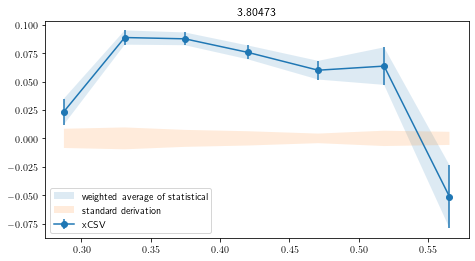

In [14]:
with open('CSVs.json') as jCSV_infile:
    j_CSV = json.load(jCSV_infile)
#for first Q2
Q2 = 0
CSV_means = []
CSV_means_sig = []

xbjs = []
for FF_key,FF_values in j_CSV.items():
    FF_name  = FF_key
    Q2s = FF_values["Q2"]
    Q2 = Q2s[2]
    xbjs = FF_values["xbj_threes"]
    CSVs = FF_values["CSVs_threes"]
    CSVs_err = FF_values["CSVs_threes_errs"]
    CSV_means.append(CSVs)
    CSV_means_sig.append(CSVs_err)
CSV_mean = np.array(Get_mean_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_mean_err = np.array(Get_meansigma_lists(CSV_means[0],CSV_means[1],CSV_means[2]))
CSV_sumofsigma = np.array(Get_sumofsigma_lists(CSV_means_sig[0],CSV_means_sig[1],CSV_means_sig[2]))
plt.errorbar(xbjs,CSV_mean,CSV_sumofsigma,fmt = "-o",label = "xCSV")
plt.fill_between(xbjs,CSV_mean-CSV_sumofsigma,CSV_mean+CSV_sumofsigma,alpha = 0.15,label = "weighted average of statistical")
plt.fill_between(xbjs,-CSV_mean_err,CSV_mean_err,alpha = 0.15,label = "standard derivation")
plt.title(Q2)
plt.legend()
#plt.title(Q2)